# 1.0 Import Dependencies

In [132]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV

import joblib

import warnings
warnings.filterwarnings('ignore')

# 2.0 Load Data

In [4]:
df = pd.read_csv(r'/content/data_feature_engineering.csv')

# 3.0 Feature Selection

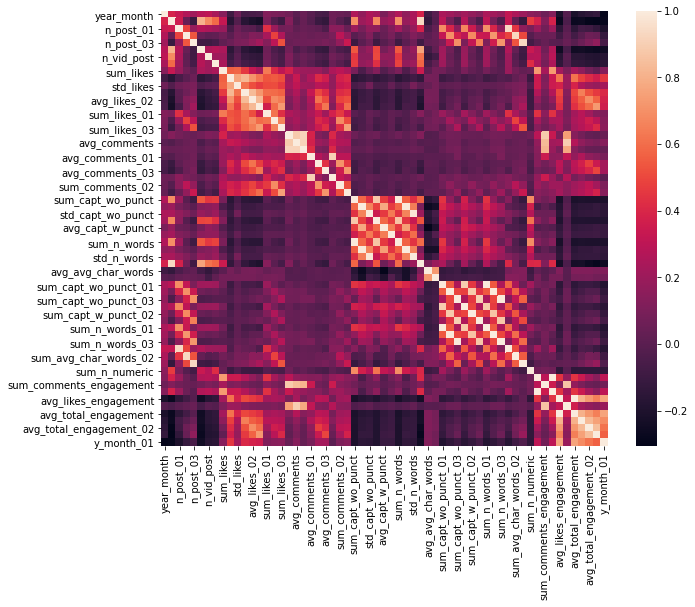

In [5]:
#i choose variables with the value of correlation coefficient r < -0.2 and r > 0.3
#it is very subjective matter
plt.figure(figsize=(10,8))
sns.heatmap(df.corr());

In [6]:
feature = ['username', 'year_month', 'n_post', 'n_post_01', 'n_img_post', 'avg_likes', 'avg_likes_01', 'avg_likes_02',
          'avg_likes_03', 'sum_capt_wo_punct', 'sum_n_words', 'sum_avg_char_words', 'sum_likes_engagement',
          'sum_total_engagement', 'avg_likes_engagement', 'avg_total_engagement', 'avg_total_engagement_01',
          'avg_total_engagement_02', 'avg_total_engagement_03', 'y_month_01']

In [7]:
#remove outliers
df = df[df['y_month_01']<=20].reset_index(drop=True)

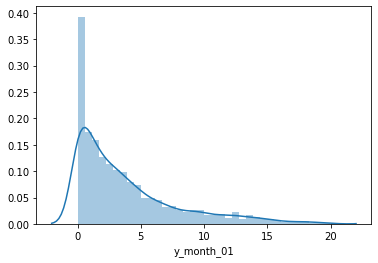

In [8]:
sns.distplot(df['y_month_01'])

In [9]:
df_w_feat = df[feature]
df_wo_feat = df.copy(deep=True)

# 4.0 Modelling Without Feature Selection Without Tuning
- In the process of modelling, I use 3 models.
- Linear Regression as Baseline Model.
- Random Forest and XGBoost as Main Model.

In [10]:
#I split data for prediction and for training
df_prediction_1 = df_wo_feat[df_wo_feat['year_month']==202006].reset_index(drop=True)
df_training_1 = df_wo_feat[df_wo_feat['year_month']!=202006].reset_index(drop=True)

In [11]:
#Create predictors and target variables
X = df_training_1.drop(columns=['username', 'year_month', 'y_month_01'])
y = df_training_1['y_month_01']

#split for data training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## 4.1 Linear Regression (Baseline Model)

In [12]:
lin_reg = LinearRegression(normalize=True)

lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [13]:
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)
y_pred_all = lin_reg.predict(X)

In [14]:
#RMSE data training
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f'RMSE training data {rmse_train}')

#RMSE data testing
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f'RMSE testing data {rmse_test}')

#RMSE All data
rmse_all = np.sqrt(mean_squared_error(y, y_pred_all))
print(f'RMSE all data {rmse_all}')

RMSE training data 2.012513070967846
RMSE testing data 2.0221416707837765
RMSE all data 2.0149251924516216


## 4.2 Random Forest

In [15]:
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
y_pred_train_2 = rf.predict(X_train)
y_pred_test_2 = rf.predict(X_test)
y_pred_all_2 = rf.predict(X)

In [37]:
#RMSE data training
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train_2))
print(f'RMSE training data {rmse_train}')

#RMSE data testing
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test_2))
print(f'RMSE testing data {rmse_test}')

#RMSE All data
rmse_all = np.sqrt(mean_squared_error(y, y_pred_all_2))
print(f'RMSE all data {rmse_all}')

RMSE training data 0.730124315259309
RMSE testing data 1.9217949425266767
RMSE all data 1.1503698413643313


## 4.3 XGBoost

In [20]:
xgboost = XGBRegressor()

xgboost.fit(X_train, y_train)

[14:04:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [38]:
y_pred_train_3 = xgboost.predict(X_train)
y_pred_test_3 = xgboost.predict(X_test)
y_pred_all_3 = xgboost.predict(X)

In [39]:
#RMSE data training
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train_3))
print(f'RMSE training data {rmse_train}')

#RMSE data testing
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test_3))
print(f'RMSE testing data {rmse_test}')

#RMSE All data
rmse_all = np.sqrt(mean_squared_error(y, y_pred_all_3))
print(f'RMSE all data {rmse_all}')

RMSE training data 1.4981377189922713
RMSE testing data 1.8823150124034043
RMSE all data 1.6028657324238236


# 5.0 Modelling Without Feature Selection With Tuning

## 5.1 RF Tuning

In [25]:
classifier_rf = RandomForestRegressor()

param_grid_rf = {
    'n_estimators' : [100, 200, 300, 400, 500],
    'max_depth' : [1, 3, 5, 7],
    'max_features' : ['auto', 'sqrt']
}

In [26]:
def rmse(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    
    return score

In [27]:
rmse_score = make_scorer(rmse, greater_is_better = False)

In [30]:
#Use Grid Search
rf_tuning = GridSearchCV(estimator = classifier_rf,
                        param_grid = param_grid_rf,
                        scoring = rmse_score,
                        verbose = 10,
                        n_jobs = -1,
                        cv = 2)

In [31]:
rf_tuning.fit(X, y)

Fitting 2 folds for each of 40 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   59.6s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  3.5min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [32]:
rf_tuning.best_params_

{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}

In [35]:
rf_tuning_best = rf_tuning.best_estimator_

In [40]:
y_pred_train_4 = rf_tuning_best.predict(X_train)
y_pred_test_4 = rf_tuning_best.predict(X_test)
y_pred_all_4 = rf_tuning_best.predict(X)

In [41]:
#RMSE data training
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train_4))
print(f'RMSE training data {rmse_train}')

#RMSE data testing
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test_4))
print(f'RMSE testing data {rmse_test}')

#RMSE All data
rmse_all = np.sqrt(mean_squared_error(y, y_pred_all_4))
print(f'RMSE all data {rmse_all}')

RMSE training data 1.6797562282931924
RMSE testing data 1.6926157845158625
RMSE all data 1.6829812085047957


## 5.2 XGBoost Tuning

In [43]:
classifier_xgb = XGBRegressor()

param_grid_xgb = {
    'n_estimators' : [100, 200, 300, 400, 500],
    'max_depth' : [1, 3, 5, 7],
    'learning_rate' : [0.01, 0.001, 0.1]
}

In [44]:
#Use Grid Search
xgb_tuning = GridSearchCV(estimator = classifier_xgb,
                        param_grid = param_grid_xgb,
                        scoring = rmse_score,
                        verbose = 10,
                        n_jobs = -1,
                        cv = 2)

In [45]:
xgb_tuning.fit(X, y)

Fitting 2 folds for each of 60 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  4.0min finished


[14:22:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.001, 0.1],
                         'max_depth': [1, 3, 5, 7],
                    

In [46]:
xgb_tuning.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400}

In [47]:
xgb_tuning_best = xgb_tuning.best_estimator_

In [48]:
y_pred_train_5 = xgb_tuning_best.predict(X_train)
y_pred_test_5 = xgb_tuning_best.predict(X_test)
y_pred_all_5 = xgb_tuning_best.predict(X)

In [49]:
#RMSE data training
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train_5))
print(f'RMSE training data {rmse_train}')

#RMSE data testing
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test_5))
print(f'RMSE testing data {rmse_test}')

#RMSE All data
rmse_all = np.sqrt(mean_squared_error(y, y_pred_all_5))
print(f'RMSE all data {rmse_all}')

RMSE training data 1.7136416944583113
RMSE testing data 1.6816470305163704
RMSE all data 1.7056971192064325


# 6.0 Modelling With Feature Selection Without Tuning

In [50]:
#I split data for prediction and for training
df_prediction_2 = df_w_feat[df_w_feat['year_month']==202006].reset_index(drop=True)
df_training_2 = df_w_feat[df_w_feat['year_month']!=202006].reset_index(drop=True)

In [53]:
#Create predictors and target variables
X_2 = df_training_2.drop(columns=['username', 'year_month', 'y_month_01'])
y_2 = df_training_2['y_month_01']

#split for data training and testing
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.25, random_state=42)

## 6.1 Linear Regression (Baseline Model)

In [64]:
lin_reg_2 = LinearRegression(normalize=True)

lin_reg_2.fit(X_train_2, y_train_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [65]:
y_pred_train_6 = lin_reg_2.predict(X_train_2)
y_pred_test_6 = lin_reg_2.predict(X_test_2)
y_pred_all_6 = lin_reg_2.predict(X_2)

In [66]:
#RMSE data training
rmse_train = np.sqrt(mean_squared_error(y_train_2, y_pred_train_6))
print(f'RMSE training data {rmse_train}')

#RMSE data testing
rmse_test = np.sqrt(mean_squared_error(y_test_2, y_pred_test_6))
print(f'RMSE testing data {rmse_test}')

#RMSE All data
rmse_all = np.sqrt(mean_squared_error(y_2, y_pred_all_6))
print(f'RMSE all data {rmse_all}')

RMSE training data 2.0519955199987243
RMSE testing data 1.999401077495627
RMSE all data 2.038970533125658


## 6.2 Random Forest

In [67]:
rf_2 = RandomForestRegressor()

rf_2.fit(X_train_2, y_train_2)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [68]:
y_pred_train_7 = rf_2.predict(X_train_2)
y_pred_test_7 = rf_2.predict(X_test_2)
y_pred_all_7 = rf_2.predict(X_2)

In [69]:
#RMSE data training
rmse_train = np.sqrt(mean_squared_error(y_train_2, y_pred_train_7))
print(f'RMSE training data {rmse_train}')

#RMSE data testing
rmse_test = np.sqrt(mean_squared_error(y_test_2, y_pred_test_7))
print(f'RMSE testing data {rmse_test}')

#RMSE All data
rmse_all = np.sqrt(mean_squared_error(y_2, y_pred_all_7))
print(f'RMSE all data {rmse_all}')

RMSE training data 0.7289869193616507
RMSE testing data 1.9533390453561856
RMSE all data 1.1630451168430191


## 6.3 XGBoost

In [70]:
xgboost_2 = XGBRegressor()

xgboost_2.fit(X_train_2, y_train_2)

[14:31:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [71]:
y_pred_train_8 = xgboost_2.predict(X_train_2)
y_pred_test_8 = xgboost_2.predict(X_test_2)
y_pred_all_8 = xgboost_2.predict(X_2)

In [72]:
#RMSE data training
rmse_train = np.sqrt(mean_squared_error(y_train_2, y_pred_train_8))
print(f'RMSE training data {rmse_train}')

#RMSE data testing
rmse_test = np.sqrt(mean_squared_error(y_test_2, y_pred_test_8))
print(f'RMSE testing data {rmse_test}')

#RMSE All data
rmse_all = np.sqrt(mean_squared_error(y_2, y_pred_all_8))
print(f'RMSE all data {rmse_all}')

RMSE training data 1.5370939328119786
RMSE testing data 1.9438583819902489
RMSE all data 1.6482525013428004


# 7.0 Modelling With Feature Selection With Tuning

## 7.1 RF Tuning 2

In [73]:
classifier_rf_2 = RandomForestRegressor()

param_grid_rf_2 = {
    'n_estimators' : [100, 200, 300, 400, 500],
    'max_depth' : [1, 3, 5, 7],
    'max_features' : ['auto', 'sqrt']
}

In [74]:
def rmse(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    
    return score

In [75]:
rmse_score = make_scorer(rmse, greater_is_better = False)

In [77]:
#Use Grid Search
rf_tuning_2 = GridSearchCV(estimator = classifier_rf_2,
                        param_grid = param_grid_rf_2,
                        scoring = rmse_score,
                        verbose = 10,
                        n_jobs = -1,
                        cv = 2)

In [78]:
rf_tuning_2.fit(X_2, y_2)

Fitting 2 folds for each of 40 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   54.4s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.5min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [79]:
rf_tuning_2.best_params_

{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 500}

In [80]:
rf_tuning_best_2 = rf_tuning_2.best_estimator_

In [81]:
y_pred_train_9 = rf_tuning_best_2.predict(X_train_2)
y_pred_test_9 = rf_tuning_best_2.predict(X_test_2)
y_pred_all_9 = rf_tuning_best_2.predict(X_2)

In [82]:
#RMSE data training
rmse_train = np.sqrt(mean_squared_error(y_train_2, y_pred_train_9))
print(f'RMSE training data {rmse_train}')

#RMSE data testing
rmse_test = np.sqrt(mean_squared_error(y_test_2, y_pred_test_9))
print(f'RMSE testing data {rmse_test}')

#RMSE All data
rmse_all = np.sqrt(mean_squared_error(y_2, y_pred_all_9))
print(f'RMSE all data {rmse_all}')

RMSE training data 1.5090911124088053
RMSE testing data 1.5014865825028307
RMSE all data 1.5071930586369684


## 7.2 XGboost Tuning 2

In [83]:
classifier_xgb_2 = XGBRegressor()

param_grid_xgb_2 = {
    'n_estimators' : [100, 200, 300, 400, 500],
    'max_depth' : [1, 3, 5, 7],
    'learning_rate' : [0.01, 0.001, 0.1]
}

In [84]:
#Use Grid Search
xgb_tuning_2 = GridSearchCV(estimator = classifier_xgb_2,
                        param_grid = param_grid_xgb_2,
                        scoring = rmse_score,
                        verbose = 10,
                        n_jobs = -1,
                        cv = 2)

In [85]:
xgb_tuning_2.fit(X_2, y_2)

Fitting 2 folds for each of 60 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.4min finished


[14:38:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.001, 0.1],
                         'max_depth': [1, 3, 5, 7],
                    

In [87]:
xgb_tuning_2.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400}

In [88]:
xgb_tuning_best_2 = xgb_tuning_2.best_estimator_

In [89]:
y_pred_train_10 = xgb_tuning_best_2.predict(X_train_2)
y_pred_test_10 = xgb_tuning_best_2.predict(X_test_2)
y_pred_all_10 = xgb_tuning_best_2.predict(X_2)

In [90]:
#RMSE data training
rmse_train = np.sqrt(mean_squared_error(y_train_2, y_pred_train_10))
print(f'RMSE training data {rmse_train}')

#RMSE data testing
rmse_test = np.sqrt(mean_squared_error(y_test_2, y_pred_test_10))
print(f'RMSE testing data {rmse_test}')

#RMSE All data
rmse_all = np.sqrt(mean_squared_error(y_2, y_pred_all_10))
print(f'RMSE all data {rmse_all}')

RMSE training data 1.7436386343286787
RMSE testing data 1.7368028965994657
RMSE all data 1.7419317486595376


# 8.0 Make Predictions
- From modelling with several scenario above, as we can see that Random Forest with Feature Selection and Tuning Hyperparameters give best Result with:
  - RMSE Train : 1.5
  - RMSE Test : 1.5
  - RMSE All : 1.5

In [107]:
#Best Model
best_model = rf_tuning_best_2

#Data for make prediction
data_predict = df_prediction_2.drop(columns=['username', 'year_month', 'y_month_01'])

#Make Prediction
final_prediction = best_model.predict(data_predict)

#Add to initial dataframe
df_prediction_2['avg_engagemnt_prediction_july'] = final_prediction

In [133]:
#save best model
joblib.dump(best_model, 'best_model_rf.pkl')

['best_model_rf.pkl']

## 8.1 Growing or Declining ?

In [127]:
df_prediction_3 = df_prediction_2[['username', 'avg_total_engagement', 'avg_engagemnt_prediction_july']].rename(columns={
    'avg_total_engagement' : 'avg_total_engagement_june',
    'avg_engagemnt_prediction_july' : 'prediction_avg_total_engagement_july'
})

In [128]:
#Find the difference between avg_total_engagement in July (prediction) and June 
#If the difference positive, so the influencers will be Growing in the July and vice versa.
df_prediction_3['avg_total_engagement_june'] = round(df_prediction_3['avg_total_engagement_june'], 2)
df_prediction_3['prediction_avg_total_engagement_july'] = round(df_prediction_3['prediction_avg_total_engagement_july'], 2)

df_prediction_3['difference_june_july'] = df_prediction_3['prediction_avg_total_engagement_july'] - df_prediction_3['avg_total_engagement_june']
df_prediction_3['difference_june_july'] = round(df_prediction_3['difference_june_july'], 2)

df_prediction_3['category'] = df_prediction_3['difference_june_july'].apply(lambda x: 'Growing' if x > 0 else 'Declining')

In [134]:
df_prediction_3.sample(10)

,username,avg_total_engagement_june,prediction_avg_total_engagement_july,difference_june_july,category
259,hanahaho,1.58,2.03,0.45,Growing
134,btsjungk00kie,2.51,2.58,0.07,Growing
31,alisyakieb,3.42,3.38,-0.04,Declining
447,nussaofficial,0.41,0.61,0.20,Growing
409,monaratuliu,1.39,1.55,0.16,Growing
455,onewithnatalia,20.94,14.03,-6.91,Declining
508,rintiksedu,5.56,6.05,0.49,Growing
278,igpersib,0.89,1.11,0.22,Growing
361,lokernas,0.24,0.60,0.36,Growing
298,iniadzwaaurell,1.83,2.22,0.39,Growing


In [131]:
df_prediction_3.to_csv('final_result.csv', index=False)